In [ ]:
#The data contains the following information:
# ID: ID Number of Customers.
# Warehouse block: The Company have big Warehouse which is divided in to block such as A,B,C,D,E.
# Mode of shipment:The Company Ships the products in multiple way such as Ship, Flight and Road.
# Customer care calls: The number of calls made from enquiry for enquiry of the shipment.
# Customer rating: The company has rated from every customer. 1 is the lowest, 5 is the highest.
# Cost of the product: Cost of the Product in US Dollars.
# Prior purchases: The Number of Prior Purchase.
# Product importance: The company has categorized the product in the various parameter such as low, medium, high.
# Gender: Male and Female.
# Discount offered: Discount offered on that specific product.
# Weight in gms: It is the weight in grams.
# Reached on time: It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time. 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('Train.csv')
data.set_index('ID', inplace = True)
data.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
ID,,,,,,,,,,,
1,D,Flight,4,2,177,3,low,F,44,1233,1
2,F,Flight,4,5,216,2,low,M,59,3088,1
3,A,Flight,2,2,183,4,low,M,48,3374,1
4,B,Flight,3,3,176,4,medium,M,10,1177,1
5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [5]:
data.rename(columns = {'Reached.on.Time_Y.N':'Reached_on_Time'}, inplace = True)
data['Warehouse_block'] = data['Warehouse_block'].replace(['F'], ['E'])

In [6]:
data.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached_on_Time
ID,,,,,,,,,,,
1,D,Flight,4,2,177,3,low,F,44,1233,1
2,E,Flight,4,5,216,2,low,M,59,3088,1
3,A,Flight,2,2,183,4,low,M,48,3374,1
4,B,Flight,3,3,176,4,medium,M,10,1177,1
5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [7]:
data.shape

(10999, 11)

In [9]:
data.isnull().sum()

Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached_on_Time        0
dtype: int64

In [10]:
data['Warehouse_block'].value_counts()

E    3666
D    1834
A    1833
B    1833
C    1833
Name: Warehouse_block, dtype: int64

In [11]:
data['Mode_of_Shipment'].value_counts()

Ship      7462
Flight    1777
Road      1760
Name: Mode_of_Shipment, dtype: int64

In [14]:
data['Prior_purchases'].value_counts()

3     3955
2     2599
4     2155
5     1287
6      561
10     178
7      136
8      128
Name: Prior_purchases, dtype: int64

In [15]:
data['Product_importance'].value_counts()

low       5297
medium    4754
high       948
Name: Product_importance, dtype: int64

In [16]:
data['Reached_on_Time'].value_counts()

1    6563
0    4436
Name: Reached_on_Time, dtype: int64

In [18]:
data.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached_on_Time
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [19]:
data.corr()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached_on_Time
Customer_care_calls,1.000000,0.012209,0.323182,0.180771,-0.130750,-0.276615,-0.067126
Customer_rating,0.012209,1.000000,0.009270,0.013179,-0.003124,-0.001897,0.013119
Cost_of_the_Product,0.323182,0.009270,1.000000,0.123676,-0.138312,-0.132604,-0.073587
Prior_purchases,0.180771,0.013179,0.123676,1.000000,-0.082769,-0.168213,-0.055515
Discount_offered,-0.130750,-0.003124,-0.138312,-0.082769,1.000000,-0.376067,0.397108
Weight_in_gms,-0.276615,-0.001897,-0.132604,-0.168213,-0.376067,1.000000,-0.268793
Reached_on_Time,-0.067126,0.013119,-0.073587,-0.055515,0.397108,-0.268793,1.000000


In [20]:
#To Determine the Effectiveness ofnthe Shipment reaching on Time or Not
# We can calculate the correlation of reaching on time

data.corr()['Reached_on_Time'].sort_values()

Weight_in_gms         -0.268793
Cost_of_the_Product   -0.073587
Customer_care_calls   -0.067126
Prior_purchases       -0.055515
Customer_rating        0.013119
Discount_offered       0.397108
Reached_on_Time        1.000000
Name: Reached_on_Time, dtype: float64

<AxesSubplot:>

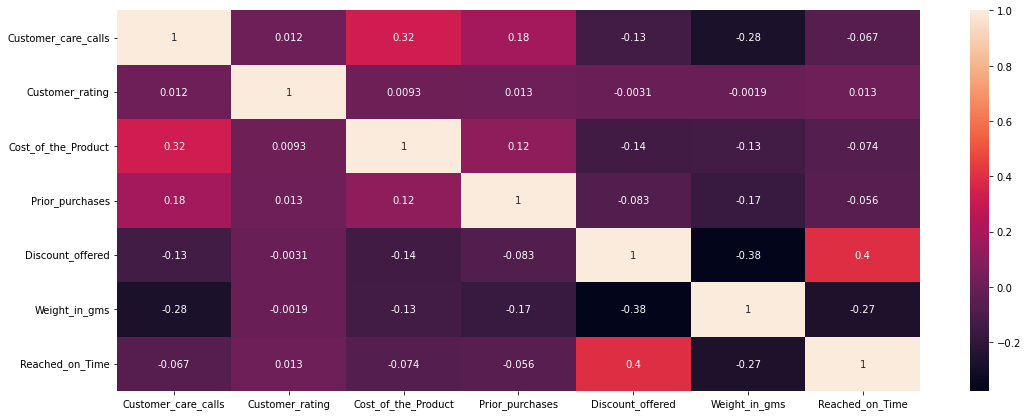

In [22]:
plt.figure(figsize=(18, 7))
sns.heatmap(data.corr(), annot=True)

In [31]:
categorical = ['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls', 'Customer_rating', 'Prior_purchases', 'Product_importance', 'Gender']

criterion_col = 'Reached_on_Time'

<AxesSubplot:>

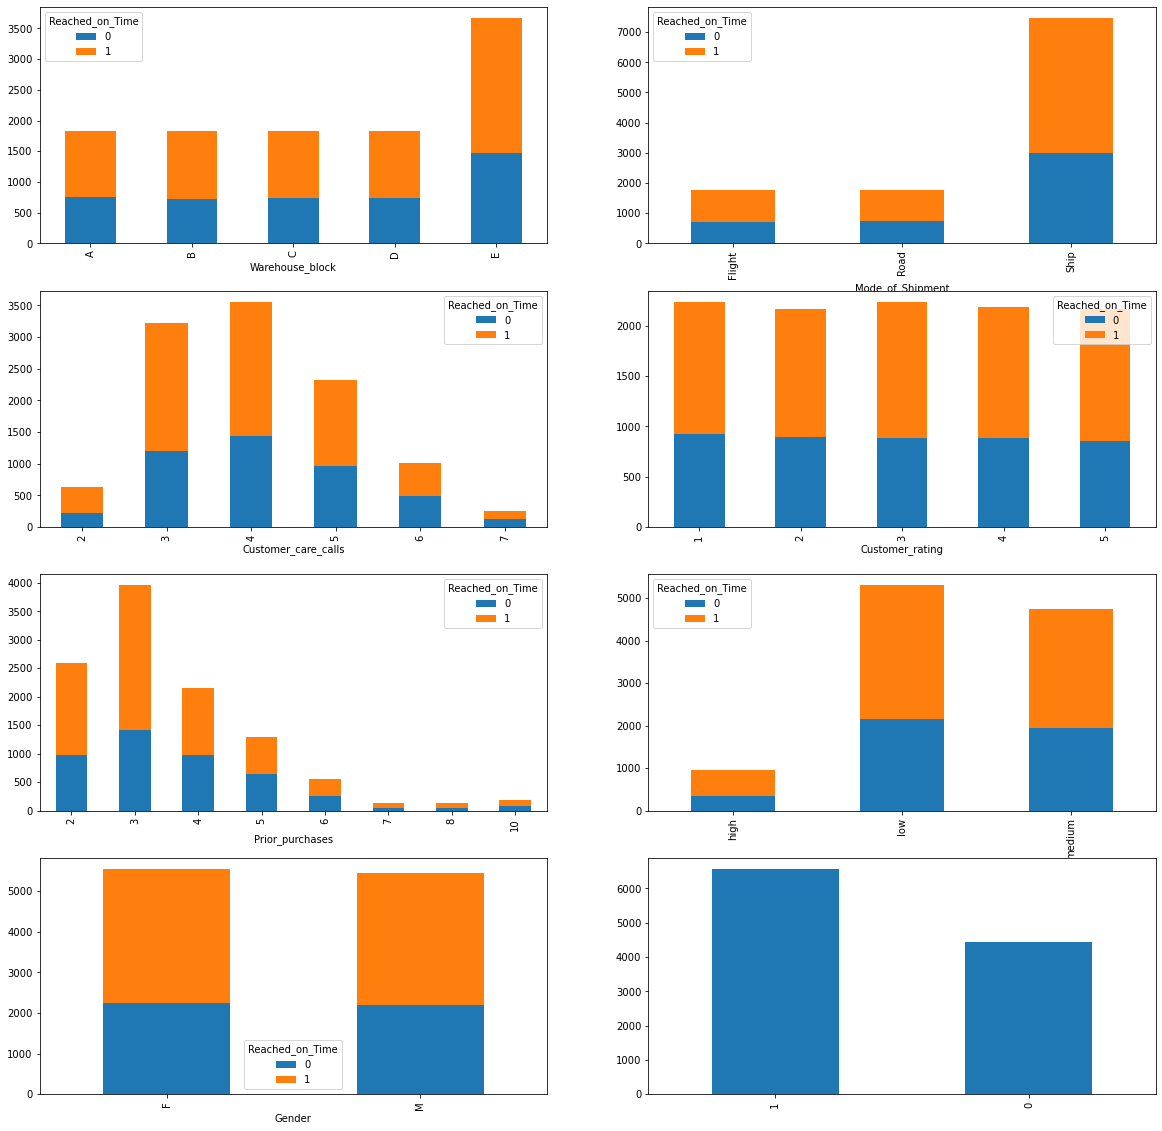

In [32]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 20))
for i in range(len(categorical)):
    data_chart = pd.concat([data[[categorical[i]]], data[[criterion_col]]], axis=1)
    data_chart_group = data_chart.groupby([categorical[i], criterion_col])[categorical[i]].count().unstack(criterion_col)
    data_chart_group.plot(kind='bar', stacked=True, ax=axes[i//2, i % 2])

data[criterion_col].value_counts().plot(kind='bar', ax=axes[3, 1])